# 📊 **TELECOM X** – Análisis de Evasión de Clientes


Has sido contratado como **asistente de análisis de datos** en *Telecom X* y formarás parte del equipo del proyecto **"Churn de Clientes"**. 

La empresa enfrenta una **alta tasa de cancelaciones** de clientes y necesita comprender los factores que contribuyen a la pérdida de usuarios. Tu desafío será:

- 📥 **Recopilar** y **preparar** los datos.
- 🧹 **Procesar** los datos utilizando herramientas de Python.
- 📈 **Analizar** los datos para extraer información valiosa que permita tomar decisiones informadas.

Este análisis será clave para que el equipo de **Data Science** pueda:

- Construir modelos predictivos de cancelación de clientes.
- Desarrollar estrategias para reducir la tasa de evasión.

Tu trabajo será esencial para ayudar a la empresa a mejorar la **retención de clientes** y optimizar sus decisiones estratégicas.




In [815]:
import pandas as pd
import numpy as np
import json
import matplotlib
import requests

### **Extracción de datos**

In [816]:
url="https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
datos_telecom=requests.get(url)
res= json.loads(datos_telecom.text)

In [817]:
df=pd.DataFrame(res)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [818]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [819]:
df.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [820]:
df=pd.json_normalize(df.to_dict(orient='records'), sep='.')

In [821]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [822]:
df.tail()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


## 🔧Transformación (T - Transform)

### 📘 Diccionario de datos

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* customer.gender: género del cliente (masculino o femenino)
* customer.SeniorCitizen: si el cliente es mayor de 65 años (1 = sí, 0 = no)
* customer.Partner: si el cliente tiene pareja (Yes / No)
* customer.Dependents: si el cliente tiene personas a su cargo (Yes / No)
* customer.tenure: cantidad de meses que el cliente ha estado con la empresa
* phone.PhoneService: si el cliente tiene servicio telefónico
* phone.MultipleLines: si el cliente tiene más de una línea telefónica
* internet.InternetService: tipo de proveedor de Internet (DSL, Fiber optic, No)
* internet.OnlineSecurity: suscripción adicional de seguridad en línea
* internet.OnlineBackup: suscripción adicional de respaldo en línea
* internet.DeviceProtection: suscripción adicional de protección para el dispositivo
* internet.TechSupport: suscripción adicional de soporte técnico
* internet.StreamingTV: servicio de televisión por streaming
* internet.StreamingMovies: servicio de películas por streaming
* account.Contract: tipo de contrato (mensual, anual, etc.)
* account.PaperlessBilling: si el cliente usa facturación electrónica (Yes / No)
* account.PaymentMethod: método de pago preferido del cliente
* account.Charges.Monthly: cargo mensual total por los servicios contratados
* account.Charges.Total: total acumulado pagado por el cliente durante su permanencia

In [823]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Valores Nulos

In [824]:
df.isnull().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


### Verificar duplicados

In [825]:
df.duplicated().sum()

np.int64(0)

### Valores únicos por columna (para detectar inconsistencias)

In [826]:
df.nunique()

customerID                   7267
Churn                           3
customer.gender                 2
customer.SeniorCitizen          2
customer.Partner                2
customer.Dependents             2
customer.tenure                73
phone.PhoneService              2
phone.MultipleLines             3
internet.InternetService        3
internet.OnlineSecurity         3
internet.OnlineBackup           3
internet.DeviceProtection       3
internet.TechSupport            3
internet.StreamingTV            3
internet.StreamingMovies        3
account.Contract                3
account.PaperlessBilling        2
account.PaymentMethod           4
account.Charges.Monthly      1585
account.Charges.Total        6531
dtype: int64

### Ver posibles inconsistencias en columnas categóricas

In [827]:

for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '37

### Espacios vacios 

In [828]:
df.apply(lambda x: x.astype(str).str.strip().eq('').sum())

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64

#### Estandarización de Datos

In [829]:
df[['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']] = df[['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']].replace( {'Yes': '1', 'No': '0', 'yes': '1', 'no': '0'})
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.9
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


### Modificando Tipo de Datos

In [830]:
df=df.convert_dtypes()

In [831]:
df = df.apply(lambda x: x.astype(str).str.strip()).replace('', np.nan)
df.isna().sum()

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64

In [832]:
df.apply(lambda x: x.astype(str).str.strip().eq('').sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [833]:
df['account.Charges.Monthly']=df['account.Charges.Monthly'].astype(np.float64)
df['account.Charges.Total']=df['account.Charges.Total'].astype(np.float64)

In [834]:
media_Charges_Total=df['account.Charges.Total'].mean()
df['account.Charges.Total']=df['account.Charges.Total'].fillna(media_Charges_Total)

In [835]:
df['Churn']=df['Churn'].fillna('-1')
df['Churn'].unique()


array(['0', '1', '-1'], dtype=object)

In [836]:
df['customerID']=df['customerID'].astype('string')

In [837]:
df[['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']] = df[['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']].astype(np.int64)
df = df[df['Churn'] != -1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   string 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   object 
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   object 
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [838]:
df[df.select_dtypes('object').columns] = df.select_dtypes('object').astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   string 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   string 
 3   customer.SeniorCitizen     7043 non-null   string 
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   string 
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   string 
 9   internet.InternetService   7043 non-null   string 
 10  internet.OnlineSecurity    7043 non-null   string 
 11  internet.OnlineBackup      7043 non-null   string 
 12  internet.DeviceProtection  7043 non-null   string 
 13  internet.TechSupport       7043 non-null   string 
 1

## 📊 Carga y análisis(L - Load & Analysis) 

### Analisis Descriptivo
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.


In [839]:
df.describe()

,Churn,customer.Partner,customer.Dependents,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.483033,0.299588,0.903166,0.592219,64.761692,2283.296277
std,0.441561,0.499748,0.458110,0.295752,0.491457,30.090047,2265.000260
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,35.500000,402.225000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,1400.550000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


### 📊 Análisis Estadístico de Variables (Post-Limpieza)

#### 🔁 `Churn` (Cancelación del Servicio)
- **Media:** 0.265 → Aproximadamente el **26.5%** de los clientes cancelaron el servicio.
- **Mediana (50%):** 0.0 → La mayoría de los clientes **no cancelaron**.
- **Máximo:** 1 → Confirmamos que la variable está **codificada binariamente** (0: No canceló, 1: Canceló).


#### 🧑‍🤝‍🧑 `customer.Partner`
- **Media:** 0.483 → Alrededor del **48.3%** de los clientes tiene pareja.
- ✔️ Distribución balanceada entre tener o no pareja.

#### 👶 `customer.Dependents`
- **Media:** 0.299 → Solo el **29.9%** de los clientes tiene dependientes.
- ✔️ Esto puede indicar que una mayoría de los clientes son personas sin responsabilidades familiares directas.

#### 📞 `phone.PhoneService`
- **Media:** 0.903 → El **90.3%** de los clientes tiene servicio telefónico.
- **Mediana:** 1 → La mayoría **sí cuenta** con este servicio.

#### 🧾 `account.PaperlessBilling` (Facturación Electrónica)
- **Media:** 0.592 → Cerca del **59.2%** de los clientes usa **factura electrónica**.

#### 💰 `account.Charges.Monthly` (Cargo Mensual)
- **Media:** 64.76  
- **Mínimo:** 18.25  
- **Máximo:** 118.75  
- **Distribución intercuartílica:**
  - **25%** de los clientes pagan menos de **35.42**
  - **50% (Mediana):** pagan menos de **70.35**
  - **75%:** pagan menos de **89.85**
- ✔️ Se observa una distribución amplia de cargos mensuales, lo que podría influir en el comportamiento de cancelación.

#### 💳 `account.Charges.Total` (Cargo Total Acumulado)
- **Media:** 2283.30  
- **Mínimo:** 18.80  
- **Máximo:** 8684.80  
- **Distribución:**
  - 25% de los clientes han pagado menos de **402.22**
  - 50% (Mediana): menos de **1400.55**
  - 75%: menos de **3786.60**
- 📌 Posible variable clave para identificar clientes en riesgo de cancelar, especialmente aquellos con **cargos bajos y poco tiempo con la empresa**.


#### 📌 Hallazgos Clave

1. 🔻 **Tasa de cancelación moderada (~26.5%)**, lo que representa un desafío para la retención de clientes.
2. 🧑‍🤝‍🧑 Menos de la mitad de los clientes tiene **pareja (48.3%)** o **dependientes (29.9%)**, lo que podría influir en patrones de consumo o cancelación.
3. 📞 La mayoría utiliza **servicio telefónico (90.3%)** y **facturación electrónica (59.2%)**, lo que indica una alta digitalización de los usuarios.
4. 💰 Existe una **gran variabilidad en los cargos mensuales y totales**, reflejando distintos perfiles de clientes: desde nuevos hasta antiguos, y de bajo a alto consumo.





### Distribución de evasión
el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

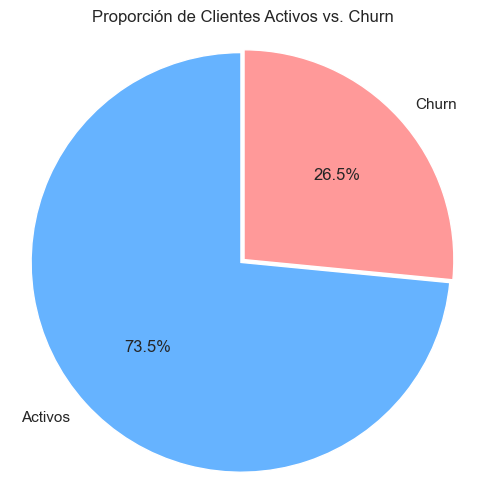

In [840]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la variable churn_counts correctamente
churn_counts = df['Churn'].value_counts()

# Gráfico circular (Pie Chart)
plt.figure(figsize=(6,6))
plt.pie(churn_counts,labels=['Activos', 'Churn'],autopct='%1.1f%%',colors=['#66b3ff', '#ff9999'], startangle=90, explode=(0.02, 0))
plt.title('Proporción de Clientes Activos vs. Churn')
plt.axis('equal')  # Hace que el gráfico sea un círculo perfecto
plt.show()

### Análisis de Distribución de Variables Categoricas por Evasión 

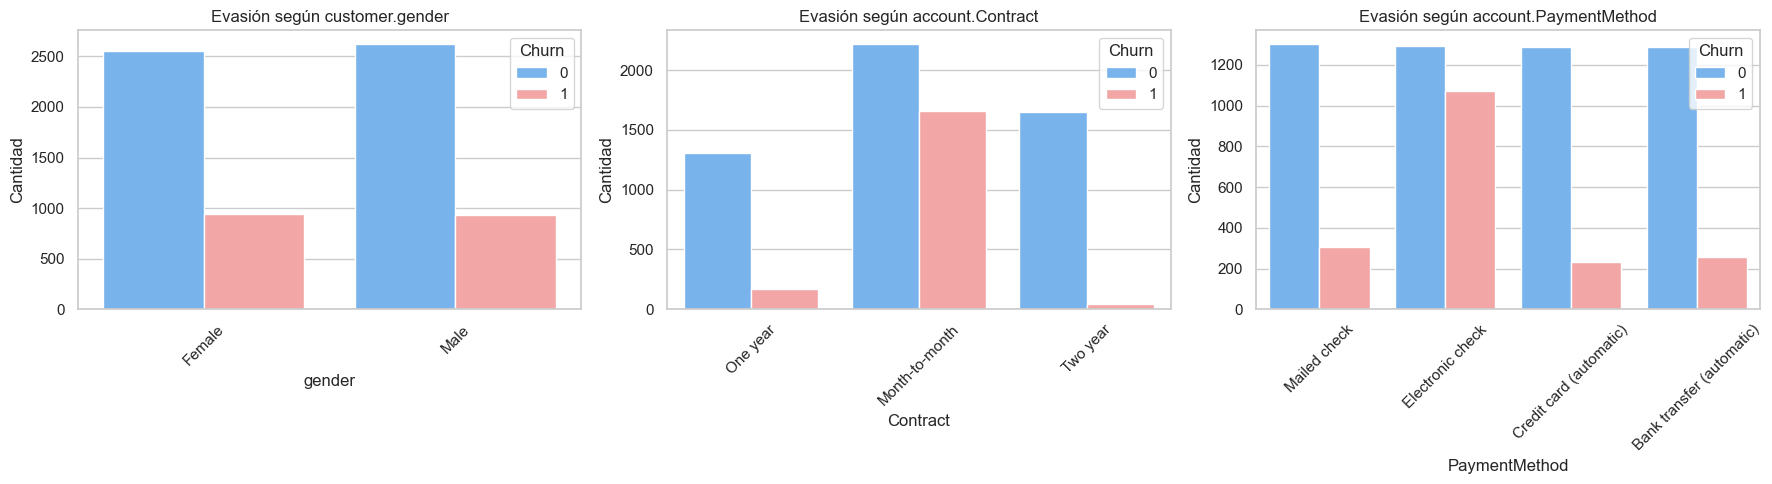

In [841]:

# Configuración general del estilo
sns.set(style="whitegrid")

# Variables categóricas a analizar
categorical_vars = ['customer.gender', 'account.Contract', 'account.PaymentMethod']

# Crear una figura con subplots
plt.figure(figsize=(18, 5))

# Recorrer variables categóricas
for i, var in enumerate(categorical_vars):
    plt.subplot(1, len(categorical_vars), i + 1)
    sns.countplot(
        data=df[df['Churn'] != -1],  # Excluimos registros inválidos si existen
        x=var,
        hue='Churn',
        palette=['#66b3ff', '#ff9999']
    )
    plt.title(f'Evasión según {var}')
    plt.xlabel(var.split('.')[-1])
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



### Análisis de Distribución de Variables Numéricas por Evasión 

C:\Users\USER\AppData\Local\Temp\ipykernel_9048\4211971821.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_9048\4211971821.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


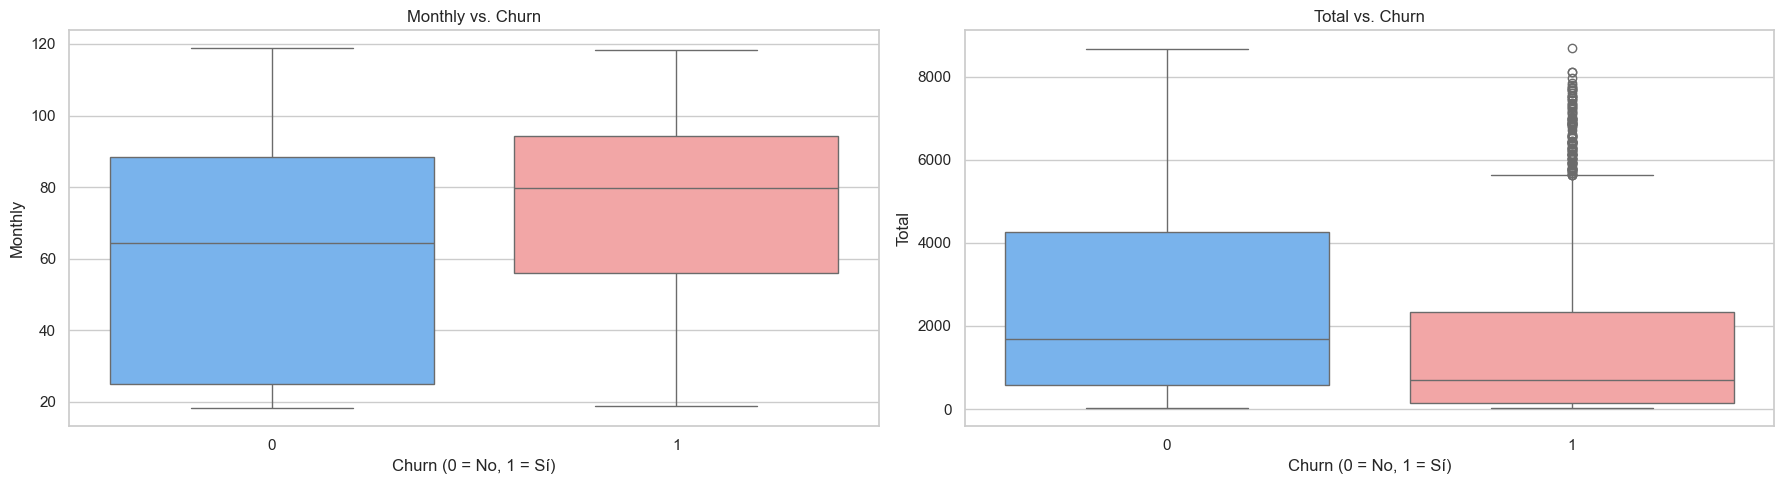

In [842]:
# Asegúrate de excluir valores erróneos como -1 si los hay
df_filtrado = df[df['Churn'] != -1]

# Lista de variables numéricas a analizar
numerical_vars = ['account.Charges.Monthly', 'account.Charges.Total']

# Tamaño de la figura
plt.figure(figsize=(18, 5))

# Graficamos cada variable
for i, var in enumerate(numerical_vars):
    plt.subplot(1, len(numerical_vars), i + 1)
    sns.boxplot(
        data=df_filtrado,
        x='Churn',
        y=var,
        palette=['#66b3ff', '#ff9999']
    )
    plt.title(f'{var.split(".")[-1]} vs. Churn')
    plt.xlabel('Churn (0 = No, 1 = Sí)')
    plt.ylabel(var.split('.')[-1])

plt.tight_layout()
plt.show()

### Analisis de Correlación

c:\Users\USER\Documents\2025-1\CIENCIA DE DATOS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


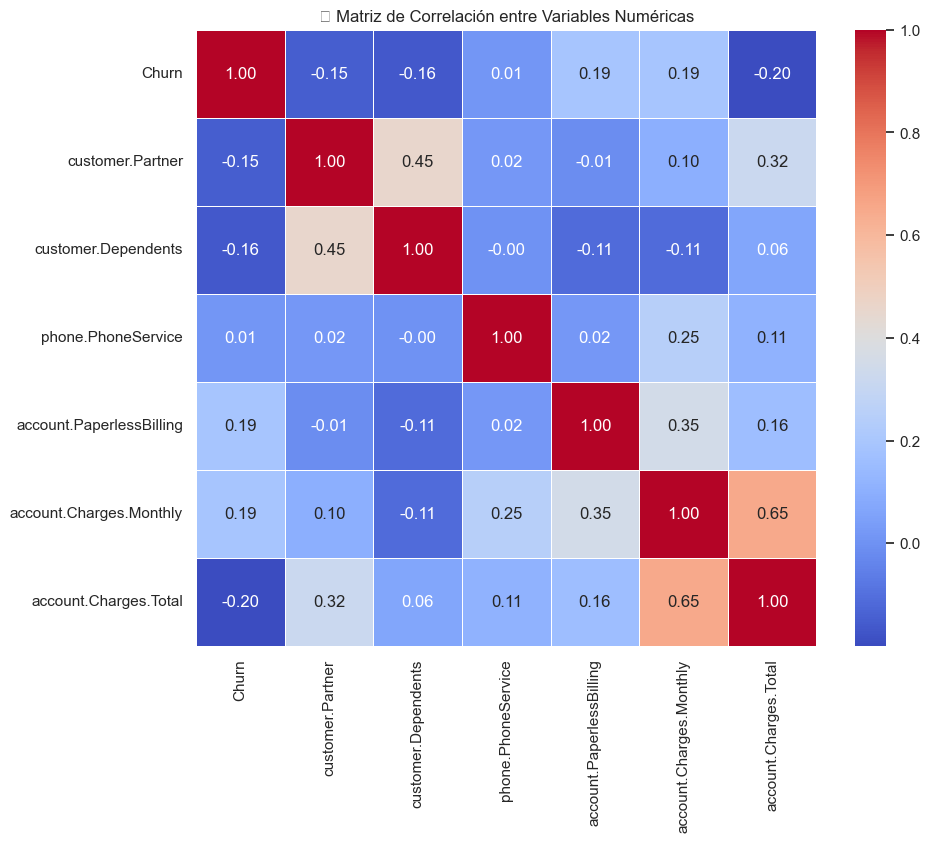

In [843]:
# Asegúrate de trabajar solo con columnas numéricas
df_numerico = df.select_dtypes(include='number')

# Excluir registros con churn -1 si existen
df_numerico = df_numerico[df_numerico['Churn'] != -1]

# Matriz de correlación
correlaciones = df_numerico.corr(numeric_only=True)

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔍 Matriz de Correlación entre Variables Numéricas')
plt.show()